In [27]:
from time import process_time
from memory_profiler import profile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

In [5]:
pip install memory_profiler

In [6]:
%load_ext memory_profiler

Import Data and Apply SMOTE Oversampling

In [7]:
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Ryerson/CIND820/project files/online_shoppers_intention (1).csv")

In [8]:
#Identify categorical attributes
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
df_cat = df[categorical_features]

df_onehot = pd.get_dummies(df, columns = categorical_features, prefix = categorical_features)

#Tranform categorical attributes
label_encoder = LabelEncoder()
df_onehot['Revenue'] = label_encoder.fit_transform(df['Revenue'])

In [9]:
#Specify independent/ dependent values
X = df_onehot.drop(columns = "Revenue")
y = df_onehot["Revenue"]

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Model Functions

In [10]:
#Decision Tree Function
def DTClassifier(X_train, y_train, X_test, y_test):
  #Initialize the DecisionTreeClassifier
  tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

  #Time Measurement
  start_time = process_time()

  #Fit the Classifier to the data
  tree_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = tree_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

In [22]:
#Random Forest Model
def RFClassifier(X_train, y_train, X_test, y_test):
  #Initialize the Random Forest Classifier
  forest_raw_imbalanced = RandomForestClassifier(n_estimators = 100)

  #Time Measurement
  start_time = process_time()

  #Fit the classifier to the data
  forest_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = forest_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

In [12]:
#Logistic Regression Model
def LRClassifier(X_train, y_train, X_test, y_test):
  #Initialize the Logistic Regression Classifier
  lr_raw_imbalanced = LogisticRegression(max_iter = 1000)

  #Time Measurement
  start_time = process_time()

  #Fit the classifier to the data
  lr_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = lr_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

Feature Selection

Pearson Correlation (Filter method)

<Axes: >

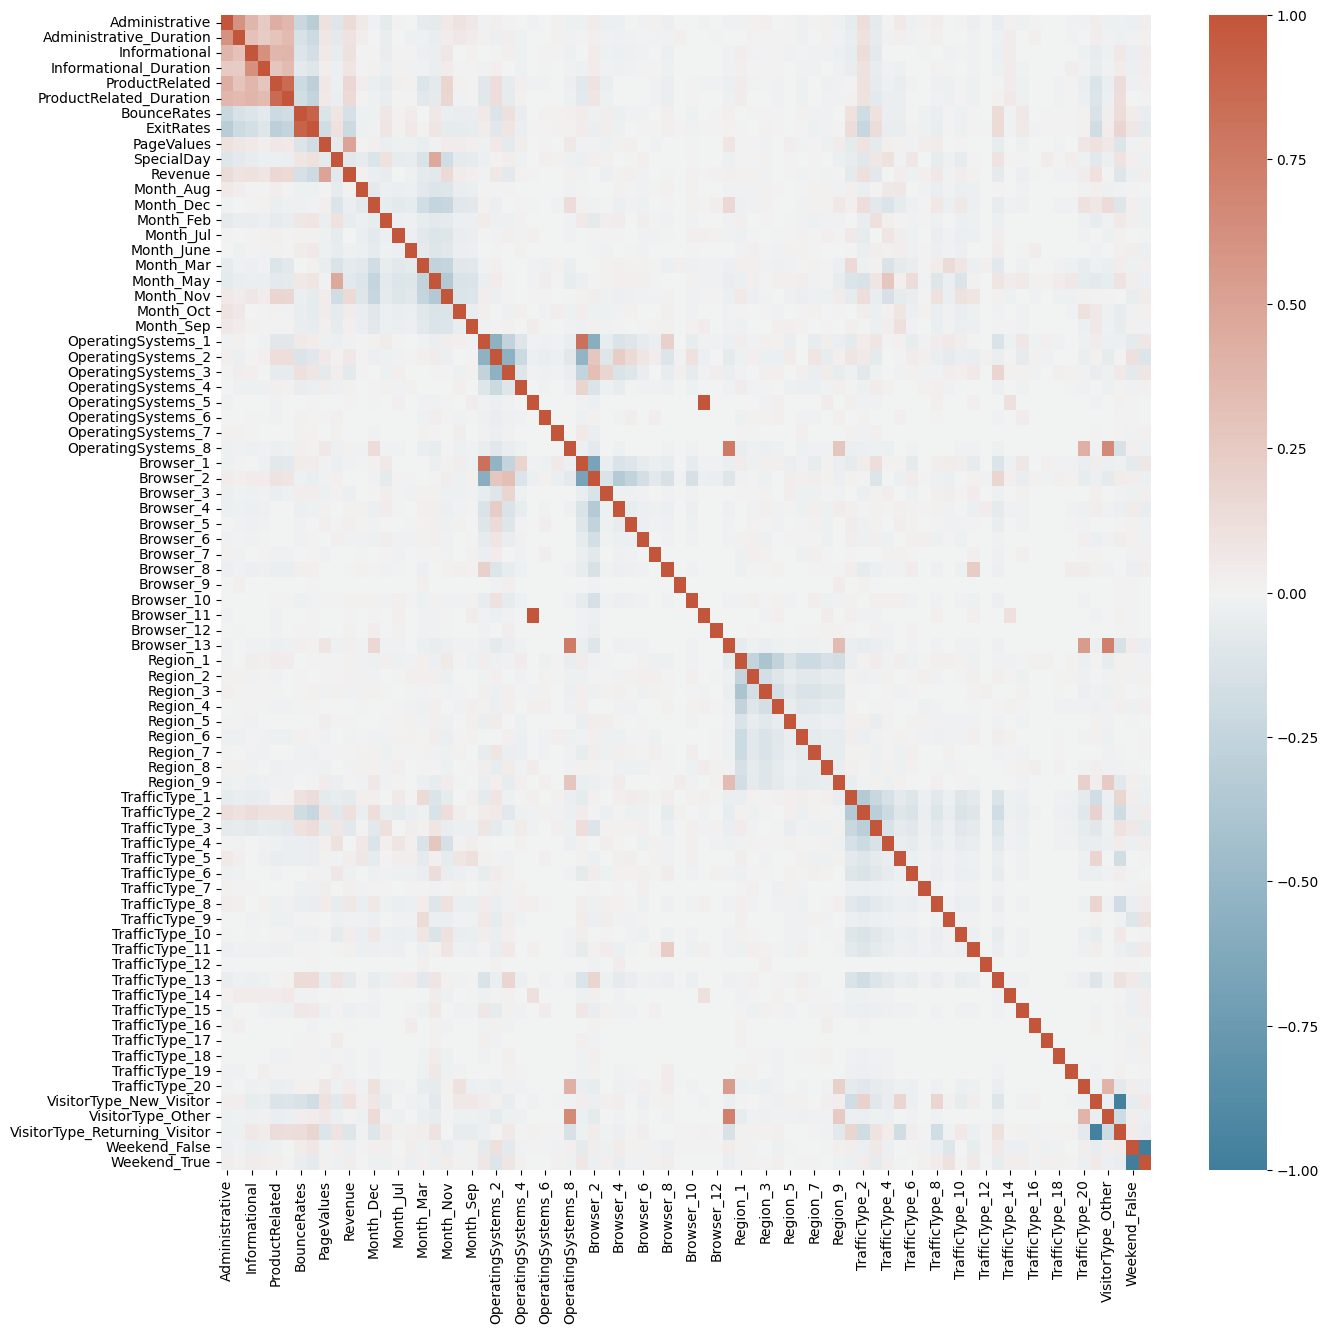

In [13]:
import seaborn as sns

#Correlation of Onehot encoded dataset

corr = df_onehot.corr()
f, ax = plt.subplots(figsize = (15, 15))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, annot = False, cmap = cmap)

In [14]:
revenue_correlation = corr["Revenue"]
sorted_pearson_correlation = revenue_correlation.abs().sort_values(ascending = False)
print(sorted_pearson_correlation)

Revenue               1.000000
PageValues            0.492569
ExitRates             0.207071
ProductRelated        0.158538
Month_Nov             0.154774
                        ...   
Browser_11            0.000727
OperatingSystems_5    0.000727
TrafficType_4         0.000336
Browser_8             0.000236
TrafficType_14        0.000081
Name: Revenue, Length: 76, dtype: float64


Keeping top quantile of features

In [50]:
sorted_pearson_correlation_df = pd.DataFrame(sorted_pearson_correlation)
sorted_pearson_correlation_df.describe()

,Revenue
count,76.000000
mean,0.057610
std,0.129896
min,0.000081
25%,0.008672
50%,0.017519
75%,0.066253
max,1.000000


In [65]:
SPC_topquantile = sorted_pearson_correlation_df.quantile(0.75)
filtered_df = sorted_pearson_correlation_df[sorted_pearson_correlation_df >= SPC_topquantile]
filtered_df.dropna(inplace = True)
#18 attributes were kept, were in the top quantile

In [72]:
df_pearson = df_onehot[filtered_df.index.tolist()]

In [66]:
#Tranform categorical attributes
label_encoder = LabelEncoder()
df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])

<ipython-input-66-c2b9f6e102af>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])


In [67]:
#Specify independent/ dependent values
X_p = df_pearson.drop(columns = "Revenue")
y_p = df_pearson["Revenue"]

#Split the Data
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size = 0.3)

smote = SMOTE()
X_p_train_smote, y_p_train_smote = smote.fit_resample(X_p_train, y_p_train)

In [68]:
%memit DTClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3127
           1       0.50      0.64      0.56       572

    accuracy                           0.85      3699
   macro avg       0.72      0.76      0.73      3699
weighted avg       0.86      0.85      0.85      3699

[[2763  364]
 [ 205  367]]
0.22555790700000244
peak memory: 361.33 MiB, increment: 0.01 MiB


In [69]:
%memit RFClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3127
           1       0.62      0.71      0.66       572

    accuracy                           0.89      3699
   macro avg       0.78      0.82      0.80      3699
weighted avg       0.90      0.89      0.89      3699

[[2874  253]
 [ 164  408]]
2.518135339000004
peak memory: 361.35 MiB, increment: 0.00 MiB


In [70]:
%memit LRClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3127
           1       0.58      0.60      0.59       572

    accuracy                           0.87      3699
   macro avg       0.75      0.76      0.76      3699
weighted avg       0.87      0.87      0.87      3699

[[2881  246]
 [ 230  342]]
3.725537701999997
peak memory: 361.35 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest (Embedded method)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

#Fit random forest classifier
rf_classifier.fit(X_train_smote, y_train_smote)

feature_importances = rf_classifier.feature_importances_

rf_df = pd.DataFrame({"Feature": X_train_smote.columns, "Importance": feature_importances})

sorted_features = np.argsort(feature_importances)[::-1]

for i, idx in enumerate(sorted_features):
    print(f"Feature {i+1}: {feature_importances[idx]}")

In [30]:
rf_df_sorted = rf_df.sort_values("Importance", ascending = False)
rf_df_sorted = rf_df_sorted.reset_index(drop = True)
rf_df_sorted

,Feature,Importance
0,PageValues,3.279985e-01
1,ExitRates,6.684630e-02
2,ProductRelated_Duration,5.688299e-02
3,ProductRelated,4.240248e-02
4,Administrative_Duration,4.143157e-02
...,...,...
70,Browser_9,1.374035e-05
71,TrafficType_16,4.434217e-06
72,TrafficType_18,8.963390e-08
73,TrafficType_12,0.000000e+00


<BarContainer object of 75 artists>

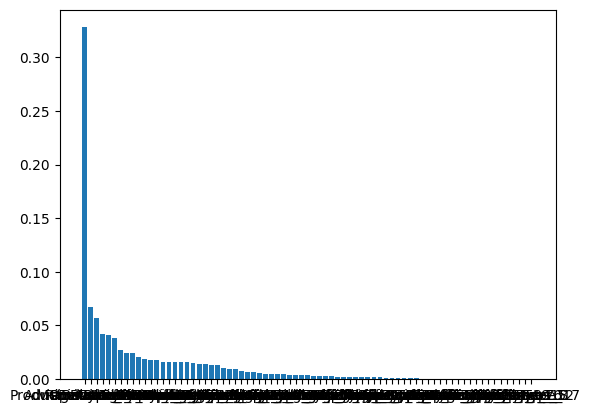

In [31]:
plt.bar(rf_df_sorted["Feature"], rf_df_sorted["Importance"])

In [91]:
rf_df_sorted.describe()
RF_topquantile = rf_df_sorted['Importance'].quantile(0.75)
RFfiltered_df = rf_df_sorted.loc[rf_df_sorted['Importance'] >= RF_topquantile]
#18 features were kept after keeping the top quartile of results

In [96]:

filtered_attributes_rf = RFfiltered_df.index.tolist()
df_rf = df_onehot[RFfiltered_df["Feature"]]

#18 features are kept after random forest feature selection
df_rf["Revenue"] = df_onehot["Revenue"]

<ipython-input-96-5239ff199e99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rf["Revenue"] = df_onehot["Revenue"]


In [97]:
#Specify independent/ dependent values
X_rf = df_rf.drop(columns = "Revenue")
y_rf = df_rf["Revenue"]

#Split the Data
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3)

smote = SMOTE()
X_rf_train_smote, y_rf_train_smote = smote.fit_resample(X_rf_train, y_rf_train)

In [98]:
#Call model function

%memit DTClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3085
           1       0.55      0.61      0.58       614

    accuracy                           0.85      3699
   macro avg       0.74      0.76      0.75      3699
weighted avg       0.86      0.85      0.86      3699

[[2783  302]
 [ 240  374]]
0.16488167200000703
peak memory: 368.34 MiB, increment: 0.07 MiB


In [99]:
%memit RFClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3085
           1       0.68      0.67      0.67       614

    accuracy                           0.89      3699
   macro avg       0.81      0.80      0.80      3699
weighted avg       0.89      0.89      0.89      3699

[[2890  195]
 [ 203  411]]
3.0744406120000036
peak memory: 368.36 MiB, increment: 0.00 MiB


In [100]:
%memit LRClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3085
           1       0.57      0.60      0.58       614

    accuracy                           0.86      3699
   macro avg       0.74      0.75      0.75      3699
weighted avg       0.86      0.86      0.86      3699

[[2806  279]
 [ 248  366]]
3.7280420939999885
peak memory: 368.36 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RFE (Wrapper Method)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_X_rfe = df_onehot.drop(columns = "Revenue")
df_y_rfe = df_onehot["Revenue"]

# Instantiate the model and RFE selector
model = LogisticRegression(solver = "liblinear")
rfe_selector = RFE(model, n_features_to_select = 20)

# Perform RFE feature selection
selected_features = rfe_selector.fit_transform(df_X_rfe, df_y_rfe)

# Get the mask of selected features
feature_mask = rfe_selector.support_

# Get the ranking of features (optional)
feature_ranking = rfe_selector.ranking_

In [109]:
# Print the selected feature indices
selected_indices = [i for i, mask in enumerate(feature_mask) if mask]
print("Selected feature indices:", selected_indices)

rfe_ranking_df = pd.DataFrame({"Feature": df_X_rfe.columns, "Rank": feature_ranking})
rfe_ranking_df = rfe_ranking_df.sort_values("Rank")
rfe_ranking_df.reset_index(drop = True, inplace = True)

pd.set_option('display.max_rows', None)

print(rfe_ranking_df)

Selected feature indices: [6, 7, 9, 10, 12, 13, 17, 18, 19, 22, 30, 39, 50, 52, 56, 62, 64, 67, 73, 74]
                          Feature  Rank
0                    Weekend_True     1
1                   Weekend_False     1
2                       Month_Sep     1
3                       Month_Oct     1
4                       Month_Nov     1
5                      Browser_12     1
6                       Browser_3     1
7                  TrafficType_13     1
8                       Month_Jul     1
9                       Month_Feb     1
10                 TrafficType_15     1
11                     SpecialDay     1
12                  TrafficType_3     1
13                      ExitRates     1
14                    BounceRates     1
15                  TrafficType_7     1
16                  TrafficType_1     1
17                 TrafficType_18     1
18                      Month_Aug     1
19             OperatingSystems_3     1
20                 TrafficType_19     2
21              

In [111]:
RFEtop_quartile_value = rfe_ranking_df['Rank'].quantile(0.25)
RFEfiltered_df = rfe_ranking_df[rfe_ranking_df['Rank'] <= RFEtop_quartile_value]
RFEfiltered_df


,Feature,Rank
0,Weekend_True,1
1,Weekend_False,1
2,Month_Sep,1
3,Month_Oct,1
4,Month_Nov,1
5,Browser_12,1
6,Browser_3,1
7,TrafficType_13,1
8,Month_Jul,1
9,Month_Feb,1


In [112]:
#20 features are kept

In [115]:
filtered_attributes_rfe = RFEfiltered_df.index.tolist()
df_rfe = df_onehot[RFEfiltered_df["Feature"]]

#20 features are kept after random forest feature selection
df_rfe["Revenue"] = df_onehot["Revenue"]

<ipython-input-115-0990e098a218>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe["Revenue"] = df_onehot["Revenue"]


In [116]:
#Specify independent/ dependent values
X_rfe = df_rfe.drop(columns = "Revenue")
y_rfe = df_rfe["Revenue"]

#Split the Data
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, test_size = 0.3)

smote = SMOTE()
X_rfe_train_smote, y_rfe_train_smote = smote.fit_resample(X_rfe_train, y_rfe_train)

In [117]:
#Call decision tree function

%memit DTClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      3121
           1       0.22      0.41      0.29       578

    accuracy                           0.68      3699
   macro avg       0.55      0.57      0.54      3699
weighted avg       0.77      0.68      0.72      3699

[[2294  827]
 [ 342  236]]
0.10885565600000291
peak memory: 366.48 MiB, increment: 0.00 MiB


In [118]:
%memit RFClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      3121
           1       0.24      0.40      0.30       578

    accuracy                           0.71      3699
   macro avg       0.56      0.59      0.56      3699
weighted avg       0.78      0.71      0.74      3699

[[2395  726]
 [ 344  234]]
1.897944160999998
peak memory: 376.01 MiB, increment: 9.53 MiB


In [119]:
%memit LRClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72      3121
           1       0.26      0.78      0.39       578

    accuracy                           0.62      3699
   macro avg       0.60      0.68      0.55      3699
weighted avg       0.83      0.62      0.67      3699

[[1824 1297]
 [ 126  452]]
0.42907104100000026
peak memory: 357.19 MiB, increment: 0.00 MiB
